In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from trt.engine import TrtEngine
from trt.predictor import TrtPredictor

In [2]:
predictor = TrtPredictor("./ckpts/trt/bsamnet_e0.trt")

[11/22/2022-21:41:42] [TRT] [W] TensorRT was linked against cuBLAS/cuBLAS LT 11.6.1 but loaded cuBLAS/cuBLAS LT 11.4.1
[11/22/2022-21:41:42] [TRT] [W] TensorRT was linked against cuDNN 8.2.1 but loaded cuDNN 8.2.0
[11/22/2022-21:41:42] [TRT] [W] TensorRT was linked against cuBLAS/cuBLAS LT 11.6.1 but loaded cuBLAS/cuBLAS LT 11.4.1
[11/22/2022-21:41:42] [TRT] [W] TensorRT was linked against cuDNN 8.2.1 but loaded cuDNN 8.2.0


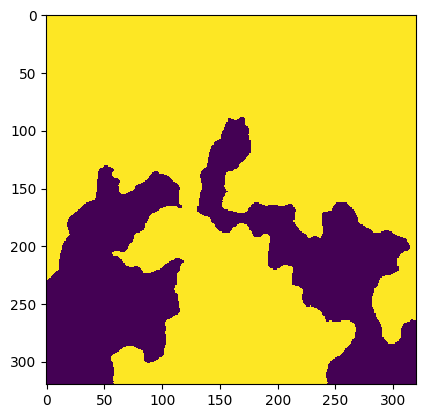

In [3]:
pred = predictor.run(Image.open("./dataset/SWINySEG/images/d0494.jpg"))
plt.imshow(pred)

In [9]:
import paddle

In [10]:
from models.bsacloudnet_large import BSACloudNet

paddle.summary(BSACloudNet(), (1, 3, 320, 320))

Loaded pretrained weights for efficientnet-b0
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       Layer (type)                               Input Shape                                                               Output Shape                                            Param #    
         Pad2D-171                             [[1, 3, 320, 320]]                                                         [1, 3, 321, 321]                                             0       
Conv2dStaticSamePadding-811                    [[1, 3, 320, 320]]                                                        [1, 32, 160, 160]                                            864      
     BatchNorm2D-1767                         [[1, 32, 160, 160]]                                                        [1, 32, 160, 160]                                            12

{'total_params': 4291699, 'trainable_params': 4194387}

In [1]:
import pandas as pd
from utils.metric import get_metrics

model_tags = [
    'bsacloudnet-large', 'bsacloudnet-large-iou',
    'bsacloudnet',
    'bsacloudnet-lite-pure', 'bsacloudnet-lite'
]
weight_paths = {k:"./ckpts/{}_epochs_100.pdparam".format(k) for k in model_tags}
dataset_path = "./dataset/SWINySEG"

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/_distutils_hack/__init__.py:19: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  "Distutils was imported before Setuptools, but importing Setuptools "
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
def evaluate_all_models(weight_paths, dataset_path, daynight='all'):
    index = list(weight_paths.keys())
    cols = ['accuracy', 'precision', 'recall', 'f_measure', 'error_rate', 'miou']

    data = []
    for key, path in weight_paths.items():
        print("- ", key)
        if 'lite' in key:
            from models.bsacloudnet_lite import BSACloudNet
        elif 'large' in key:
            from models.bsacloudnet_large import BSACloudNet
        else:
            from models.bsacloudnet import BSACloudNet
        
        accuracy, precision, recall, f_measure, error_rate, miou = get_metrics(
            BSACloudNet(), 
            path,
            dataset_path, daynight)
        
        data.append([accuracy, precision, recall, f_measure, error_rate, miou])
    dtf = pd.DataFrame(data=data, index=index, columns=cols)  
    return dtf

In [6]:
dtf_all = evaluate_all_models(weight_paths, dataset_path, daynight='all')
dtf_all

-  bsacloudnet-large
Loaded pretrained weights for efficientnet-b0
[0.4%]: [                    ] 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:278: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  format(lhs_dtype, rhs_dtype, lhs_dtype))


[100.0%]: [####################] 
-  bsacloudnet-large-iou
Loaded pretrained weights for efficientnet-b0
[100.0%]: [####################] 
-  bsacloudnet
[100.0%]: [####################] 
-  bsacloudnet-lite-pure
[100.0%]: [####################] 
-  bsacloudnet-lite
[100.0%]: [####################] 


,accuracy,precision,recall,f_measure,error_rate,miou
bsacloudnet-large,0.969399,0.968827,0.959004,0.963890,0.030601,0.920366
bsacloudnet-large-iou,0.970377,0.971105,0.960620,0.965834,0.029623,0.923336
bsacloudnet,0.960265,0.956781,0.954190,0.955483,0.039735,0.900196
bsacloudnet-lite-pure,0.942409,0.936987,0.937802,0.937394,0.057591,0.861087
bsacloudnet-lite,0.944984,0.939613,0.938473,0.939043,0.055016,0.865764


In [7]:
dtf_day = evaluate_all_models(weight_paths, dataset_path, daynight='day')
dtf_day

-  bsacloudnet-large
Loaded pretrained weights for efficientnet-b0
[0.5%]: [                    ] 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:278: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  format(lhs_dtype, rhs_dtype, lhs_dtype))


[100.0%]: [####################] 
-  bsacloudnet-large-iou
Loaded pretrained weights for efficientnet-b0
[100.0%]: [####################] 
-  bsacloudnet
[100.0%]: [####################] 
-  bsacloudnet-lite-pure
[100.0%]: [####################] 
-  bsacloudnet-lite
[100.0%]: [####################] 


,accuracy,precision,recall,f_measure,error_rate,miou
bsacloudnet-large,0.969026,0.968521,0.959446,0.963962,0.030974,0.918302
bsacloudnet-large-iou,0.970046,0.971542,0.960037,0.965755,0.029954,0.921257
bsacloudnet,0.959522,0.956873,0.953838,0.955353,0.040478,0.897124
bsacloudnet-lite-pure,0.942353,0.938645,0.937938,0.938291,0.057647,0.858796
bsacloudnet-lite,0.944592,0.940216,0.939071,0.939643,0.055408,0.862877


In [8]:
dtf_night = evaluate_all_models(weight_paths, dataset_path, daynight='night')
dtf_night

-  bsacloudnet-large
Loaded pretrained weights for efficientnet-b0
[4.1%]: [                    ] 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:278: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  format(lhs_dtype, rhs_dtype, lhs_dtype))


[100.0%]: [####################] 
-  bsacloudnet-large-iou
Loaded pretrained weights for efficientnet-b0
[100.0%]: [####################] 
-  bsacloudnet
[100.0%]: [####################] 
-  bsacloudnet-lite-pure
[100.0%]: [####################] 
-  bsacloudnet-lite
[100.0%]: [####################] 


,accuracy,precision,recall,f_measure,error_rate,miou
bsacloudnet-large,0.972437,0.971324,0.955396,0.963294,0.027563,0.937185
bsacloudnet-large-iou,0.973077,0.967543,0.965373,0.966457,0.026923,0.940274
bsacloudnet,0.966319,0.956027,0.957055,0.956541,0.033681,0.925225
bsacloudnet-lite-pure,0.942868,0.923483,0.936690,0.930040,0.057133,0.879752
bsacloudnet-lite,0.948185,0.934701,0.933608,0.934154,0.051815,0.889290
